In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from utils.helper_functions import * 
ref_sets_NA = ["Connecticut", "USA",  "North_America", "Global"]

N_content = [0.0, 0.001, 0.01, 0.1]
abundances = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]


produce result files

In [3]:
output_results_to_json_2_dirs("0.1", N_content, ref_sets_NA, abundances, "B.1.1.7_sequence")

read results

In [4]:

with open("results.json") as json_file:
    results = json.loads(json_file.read())


calculate absolute errors

In [ ]:
absolute_errors = calculate_absolute_errors_2_dir(results, N_content, ref_sets_NA, abundances)

In [ ]:
import matplotlib.pylab as plt

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

for ref_set, (i,j) in zip(ref_sets_NA, [(0,0), (0,1), (1,0), (1,1)]):
    for na in N_content:
        ax[i][j].plot(abundances, list(absolute_errors[na][ref_set].values()), label= na)
    ax[i][j].set_xlabel("Simulated abundance")
    ax[i][j].set_ylabel("Absolute prediction error")
    ax[i][j].set_xscale('log')
    ax[i][j].set_title("Reference set: {}".format(ref_set.replace("_", " ")), fontweight='bold')
    ax[i][j].grid()
    # plot x=y line black and dashed
    ax[i][j].legend()
    ax[i][j].set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80 , 90, 100])

# save figure as pdf with tight layout
if os.path.isdir("figures") == False:
 os.mkdir("figures")
plt.savefig("figures/line_plot.pdf", bbox_inches='tight')

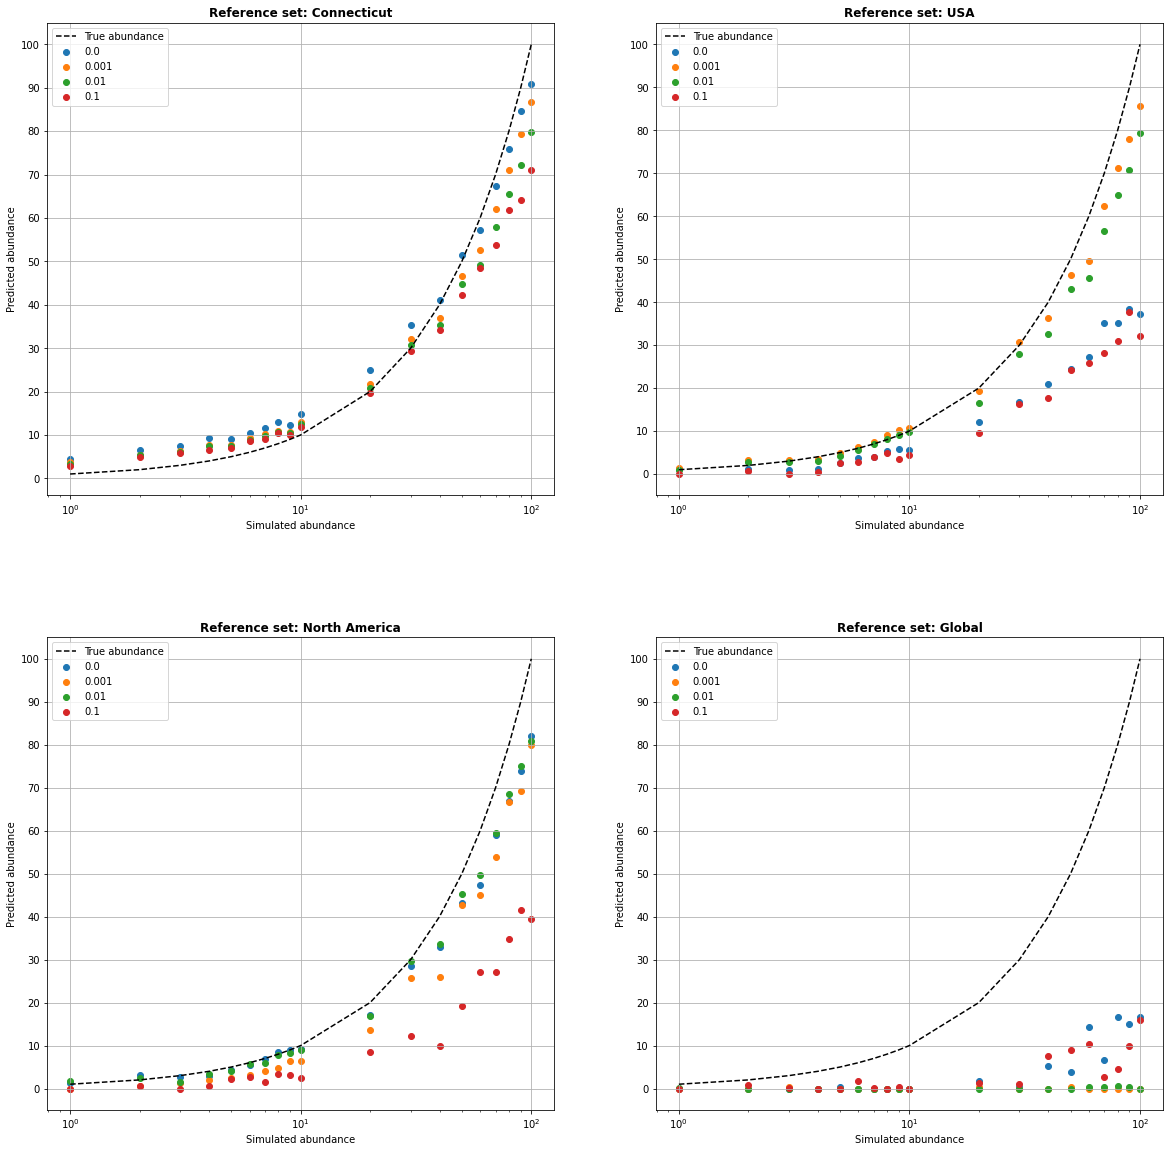

In [47]:
import matplotlib.pylab as plt

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

for ref_set, (i,j) in zip(ref_sets_NA, [(0,0), (0,1), (1,0), (1,1)]):
    for na in N_content:
        ax[i][j].scatter(abundances, [results[str(na)][ref_set][str(abundance)] for abundance in abundances], label= na)
    ax[i][j].set_xlabel("Simulated abundance")
    ax[i][j].set_ylabel("Predicted abundance")
    ax[i][j].set_xscale('log')
    ax[i][j].set_title("Reference set: {}".format(ref_set.replace("_", " ")), fontweight='bold')
    ax[i][j].grid()
    # plot x=y line black and dashed
    ax[i][j].plot(abundances, abundances, color='black', linestyle='dashed', label = "True abundance")
    ax[i][j].legend()
    ax[i][j].set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80 , 90, 100])
        # save figure as pdf with tight layout

    plt.subplots_adjust(hspace=0.3)
    if os.path.isdir("figures") == False:
        os.mkdir("figures")
    plt.savefig("figures/scatter_plot.pdf", bbox_inches='tight')
        

        

In [45]:
import pandas as pd
error_in_low_abs = dict()

for ref_set in ref_sets_NA:
    error_in_low_abs[ref_set] = dict()
    for na in N_content:
        error_in_low_abs[ref_set][na] = 0
        
        for ab in abundances[0:9]:

            error_in_low_abs[ref_set][na]+= absolute_errors[na][ref_set][str(ab)]
        error_in_low_abs[ref_set][na] = round(error_in_low_abs[ref_set][na]/10,3)

print("Average absolute prediction errors for abundances <=10")
print("------------------------------------------------------")
print(pd.DataFrame(error_in_low_abs))


Average absolute prediction errors for abundances <=10
------------------------------------------------------
       Connecticut    USA  North_America  Global
0.000        3.896  1.958          0.432   4.455
0.001        2.706  0.554          2.020   4.475
0.010        2.489  0.365          0.657   4.483
0.100        2.017  2.603          3.077   4.202


In [46]:
import pandas as pd
error_in_low_abs = dict()

for ref_set in ref_sets_NA:
    error_in_low_abs[ref_set] = dict()
    for na in N_content:
        error_in_low_abs[ref_set][na] = 0
        
        for ab in abundances[9:]:

            error_in_low_abs[ref_set][na]+= absolute_errors[na][ref_set][str(ab)]
        error_in_low_abs[ref_set][na] = round(error_in_low_abs[ref_set][na]/10,3)

print("Average absolute prediction errors for abundances >=10")
print("------------------------------------------------------")
print(pd.DataFrame(error_in_low_abs))

Average absolute prediction errors for abundances >=10
------------------------------------------------------
       Connecticut     USA  North_America  Global
0.000        4.198  29.724          8.991  46.981
0.001        6.138   6.280         12.071  54.937
0.010        8.939  10.334          8.233  54.826
0.100       11.739  32.301         32.733  48.763
